### Bibliotecas necessárias 

In [10]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy as sp

import jax.numpy as jnp
from jax import random, jit, vmap
import jax.scipy as jsp

import matplotlib.pyplot as plt

#para carregar o .mat 
from scipy.io import loadmat

In [11]:
##### Carregamento dos datasets #####

GC = loadmat('GC_LFPs.mat')
LFP = loadmat('LFP_HG_HFO.mat')

In [3]:
print(GC.keys())
print(LFP.keys())

print(f"SHAPE: {GC['LFP'].shape}")
print(f"SHAPE lfpHFO: {LFP['lfpHFO'].shape} SHAPE lfpHG: {LFP['lfpHG'].shape}")

dict_keys(['__header__', '__version__', '__globals__', 'LFP'])
dict_keys(['__header__', '__version__', '__globals__', 'lfpHFO', 'lfpHG'])
SHAPE: (144, 3500)
SHAPE lfpHFO: (1, 300000) SHAPE lfpHG: (1, 300000)


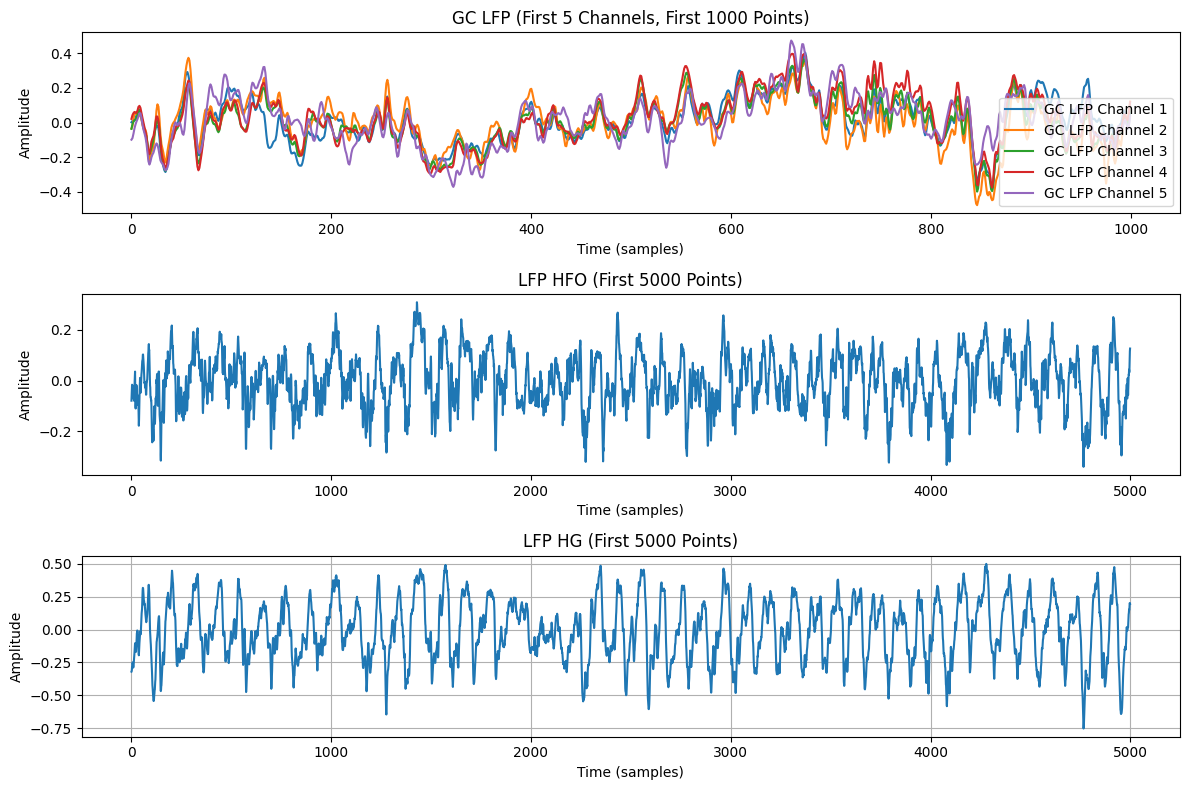

In [4]:
fig, ax = plt.subplots(3, 1, figsize=(12, 8)) 

num_channels_to_plot = 5
data_points_to_plot_gc = 1000

for i in range(min(num_channels_to_plot, GC['LFP'].shape[0])): 
    ax[0].plot(GC['LFP'][i, :data_points_to_plot_gc].T, label=f'GC LFP Channel {i+1}')
ax[0].set_title(f'GC LFP (First {num_channels_to_plot} Channels, First {data_points_to_plot_gc} Points)')
ax[0].set_xlabel('Time (samples)') 
ax[0].set_ylabel('Amplitude')
ax[0].legend() 


data_points_to_plot_lfp = 5000
ax[1].plot(LFP['lfpHFO'][0, :data_points_to_plot_lfp], label='LFP HFO') 
ax[1].set_title(f'LFP HFO (First {data_points_to_plot_lfp} Points)')
ax[1].set_xlabel('Time (samples)')
ax[1].set_ylabel('Amplitude')


ax[2].plot(LFP['lfpHG'][0, :data_points_to_plot_lfp], label='LFP HG') 
ax[2].set_title(f'LFP HG (First {data_points_to_plot_lfp} Points)')
ax[2].set_xlabel('Time (samples)')
ax[2].set_ylabel('Amplitude')

plt.tight_layout()
plt.grid(True)
plt.show()

[-0.07958984 -0.05908203 -0.03564453 ...  0.11328125  0.12988281
  0.12353516]
[-0.3203125  -0.31738281 -0.30712891 ...  0.16015625  0.16552734
  0.17041016]


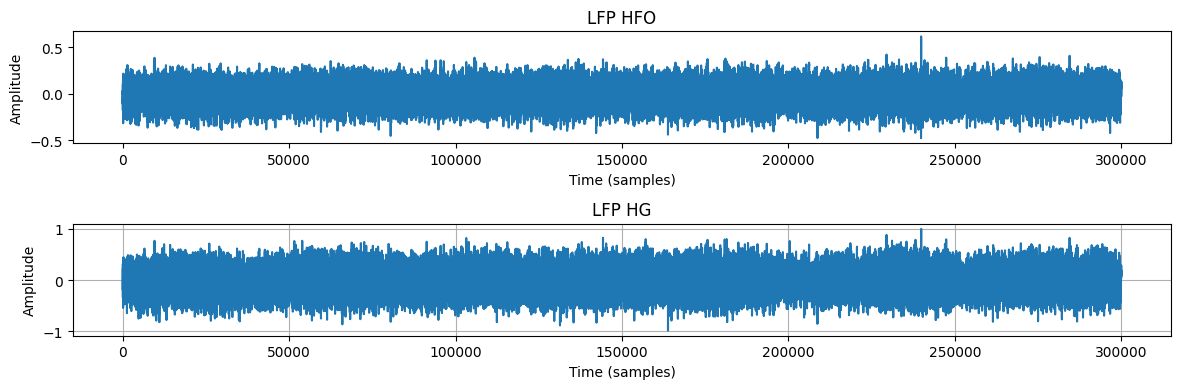

In [5]:
print(LFP['lfpHFO'][0, :])

print(LFP['lfpHG'][0, :])

fig , ax = plt.subplots(2, 1, figsize=(12, 4))

ax[0].plot(LFP['lfpHFO'][0, :], label='LFP HFO')
ax[0].set_title('LFP HFO')
ax[0].set_xlabel('Time (samples)')
ax[0].set_ylabel('Amplitude')
ax[1].plot(LFP['lfpHG'][0, :], label='LFP HG')
ax[1].set_title('LFP HG')
ax[1].set_xlabel('Time (samples)')
ax[1].set_ylabel('Amplitude')
plt.tight_layout()
plt.grid(True)
plt.show()

### Questões 1-5

Dataset LFP_HFO_HG

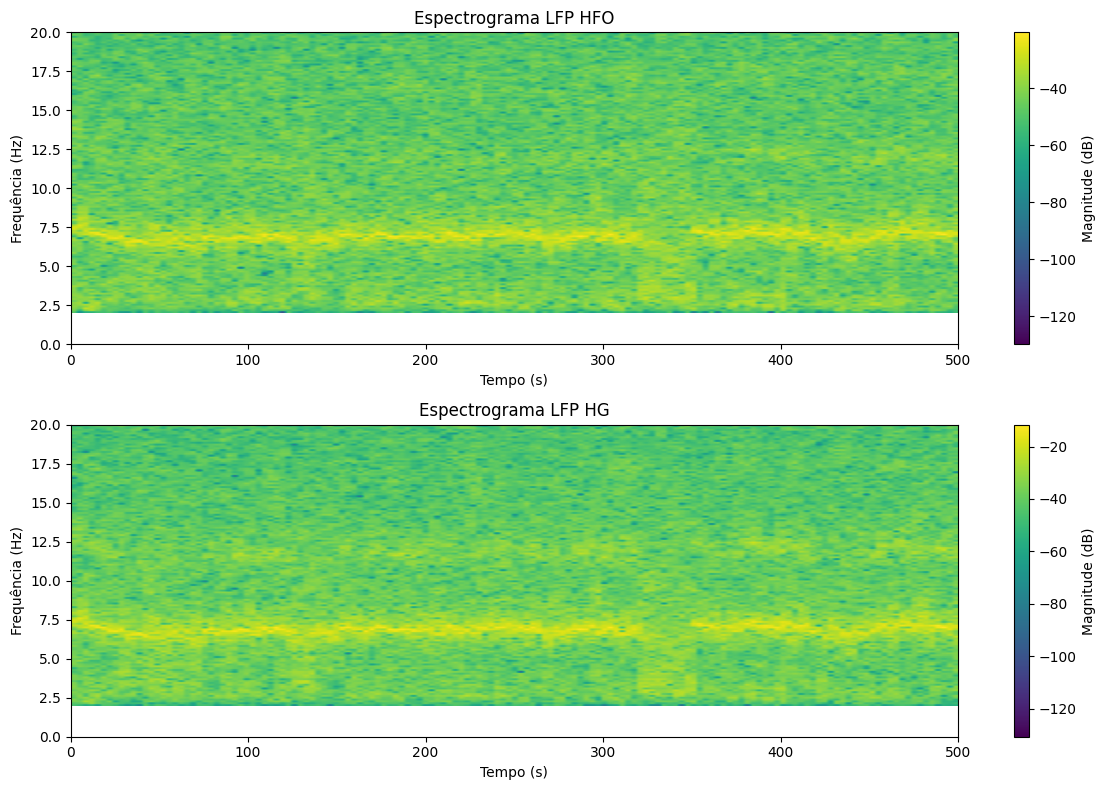

In [18]:
### Computando o TFD espectrograma ### 

lfp = LFP['lfpHFO'][0, :]
hg = LFP['lfpHG'][0, :]

fs = 1000  # Frequência de amostragem

nfft = int(fs / 0.2)

tfd_hfo = sp.signal.spectrogram(
    lfp,
    fs=1000,  # Frequência de amostragem
    nperseg=4*fs,  # Tamanho da janela
    noverlap=(4*fs)//2,  # Sobreposição entre janelas
    nfft=nfft,  # Tamanho da FFT
    scaling='spectrum'  # Escala do espectro
)

tfd_hg  = sp.signal.spectrogram(
    hg,
    fs=1000,  # Frequência de amostragem
    nperseg=4*fs,  # Tamanho da janela
    noverlap=(4*fs)//2,  # Sobreposição entre janelas
    nfft=nfft,  # Tamanho da FFT
    scaling='spectrum'  # Escala do espectro
)

# Plotando o espectrograma
fig , ax = plt.subplots(2, 1, figsize=(12, 8))
ax[0].imshow(10 * np.log10(tfd_hfo[2]), aspect='auto', origin='lower', 
           extent=[tfd_hfo[0][0], tfd_hfo[0][-1], tfd_hfo[1][0], tfd_hfo[1][-1]])
ax[0].set_title('Espectrograma LFP HFO')
ax[0].set_xlabel('Tempo (s)')
ax[0].set_ylabel('Frequência (Hz)')
ax[0].set_ylim(0,20) #hz

ax[1].imshow(10 * np.log10(tfd_hg[2]), aspect='auto', origin='lower', 
           extent=[tfd_hg[0][0], tfd_hg[0][-1], tfd_hg[1][0], tfd_hg[1][-1]])
ax[1].set_title('Espectrograma LFP HG')
ax[1].set_xlabel('Tempo (s)')
ax[1].set_ylabel('Frequência (Hz)')
ax[1].set_ylim(0,20) #hz
plt.colorbar(ax[0].images[0], ax=ax[0], label='Magnitude (dB)')
plt.colorbar(ax[1].images[0], ax=ax[1], label='Magnitude (dB)')
plt.tight_layout()
plt.show()

### Questão 2

Plotando a série temporal de potência média na faixa das oscilações teta 

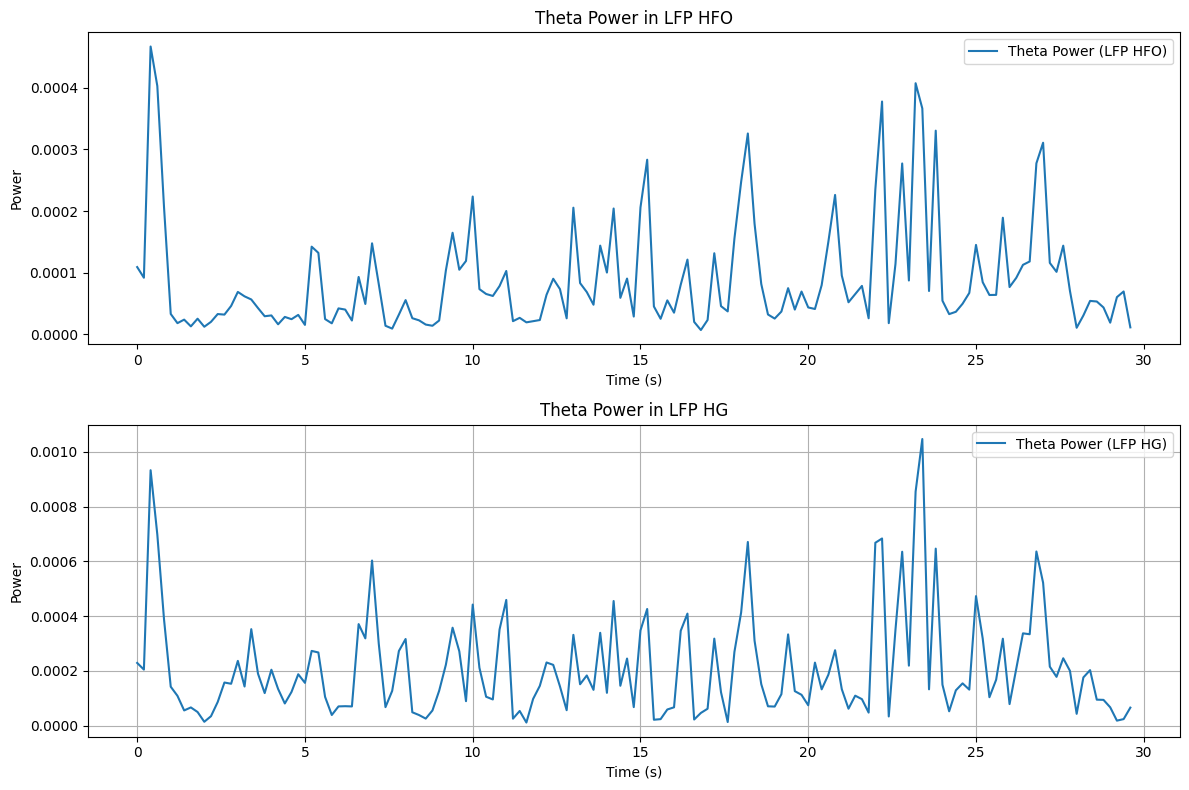

In [22]:
tfd_hfo , freqs , Sxx = sp.signal.spectrogram(
    lfp,
    fs=1000,  # Frequência de amostragem
    nperseg=4*fs,  # Tamanho da janela
    noverlap=(4*fs)//2,  # Sobreposição entre janelas
    nfft=nfft,  # Tamanho da FFT
    scaling='spectrum'  # Escala do espectro
)

tfd_hg , freqs_hg , Shg = sp.signal.spectrogram(
    hg,
    fs=1000,  # Frequência de amostragem
    nperseg=4*fs,  # Tamanho da janela
    noverlap=(4*fs)//2,  # Sobreposição entre janelas
    nfft=nfft,  # Tamanho da FFT
    scaling='spectrum'  # Escala do espectro
)


theta = (6 , 10)

theta_idx = np.where((freqs >= theta[0]) & (freqs <= theta[1]))[0]

theta_idx2 = np.where((freqs_hg >= theta[0]) & (freqs_hg <= theta[1]))[0]

theta_power = np.mean(Sxx[theta_idx, :], axis=0)
theta_power2 = np.mean(Shg[theta_idx2, :], axis=0)

fig , ax = plt.subplots(2, 1, figsize=(12, 8))

ax[0].plot(tfd_hfo[:len(theta_power)], theta_power, label='Theta Power (LFP HFO)')
ax[0].set_title('Theta Power in LFP HFO')
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Power')
ax[0].legend()

ax[1].plot(tfd_hg[:len(theta_power2)], theta_power2, label='Theta Power (LFP HG)')
ax[1].set_title('Theta Power in LFP HG')
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Power')

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Questão 3 

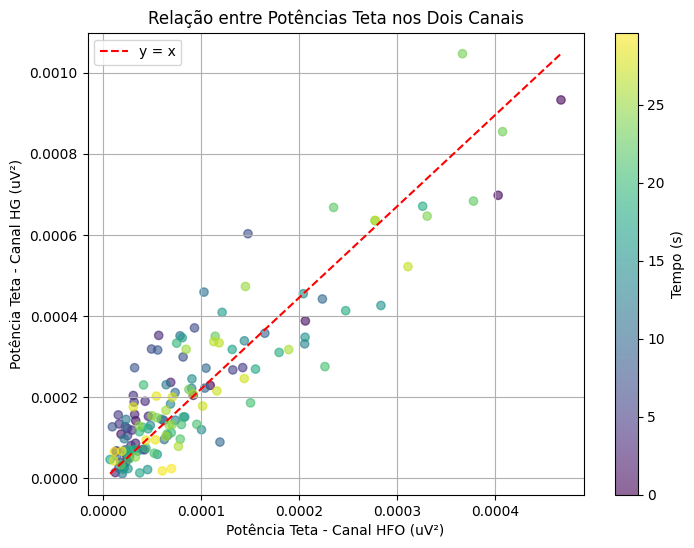

In [ ]:
theta_hfo = theta_power
theta_hg = theta_power2

# Use the correct time vectors for coloring
times_hfo = tfd_hfo[:len(theta_hfo)]
times_hg = tfd_hg[:len(theta_hg)]

plt.figure(figsize=(8, 6))
plt.scatter(theta_hfo, theta_hg, c=times_hfo, cmap='viridis', alpha=0.6)
plt.colorbar(label='Tempo (s)')
plt.xlabel('Potência Teta - Canal HFO (uV²)')
plt.ylabel('Potência Teta - Canal HG (uV²)')
plt.title('Relação entre Potências Teta nos Dois Canais')
plt.grid(True)


plt.plot([min(theta_hfo), max(theta_hfo)], [min(theta_hg), max(theta_hg)], 'r--', label='y = x')
plt.legend()

plt.show()

### Questão 4


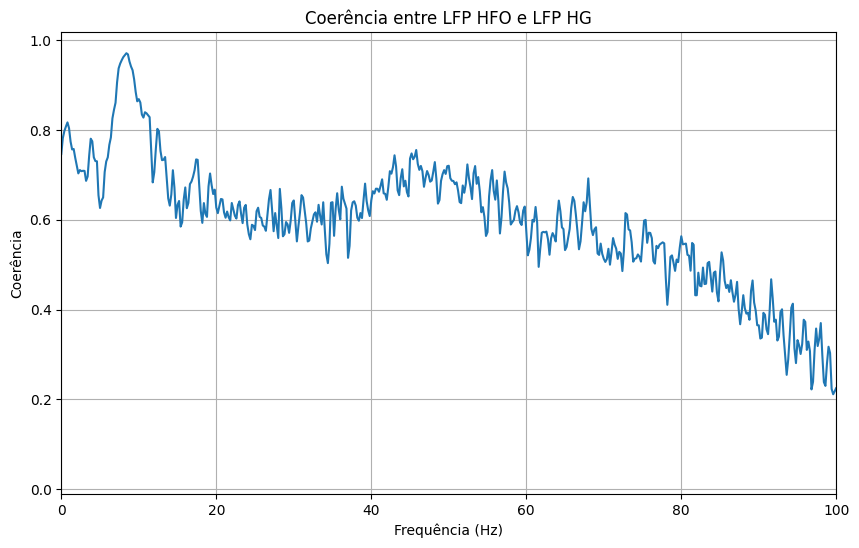

In [ ]:

### Validar depois 
sig_lfp = sp.signal.coherence(
    lfp, 
    hg, 
    fs=1000,  # Frequência de amostragem
    nperseg=4*fs,  # Tamanho da janela
    noverlap=(4*fs)//2,  # Sobreposição entre janelas
    nfft=nfft,  # Tamanho da FFT
)

plt.figure(figsize=(10, 6))
plt.plot(sig_lfp[0], sig_lfp[1])
plt.title('Coerência entre LFP HFO e LFP HG')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Coerência')
plt.grid(True)
plt.xlim(0, 100)  # Limitar o eixo x para focar
plt.show()